<a href="https://colab.research.google.com/github/oceanhackweek/Oceans19-data-science-tutorial/blob/master/3_classification_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Whale Sound Classification

In this notebook we will discuss ways to classify signals using annotated data.

### Objectives:
* train a machine learning classifier with the scikit-learn package
* learn how to evaluate machine learning models

<img src="https://github.com/oceanhackweek/ohw19-tutorial-machine-learning/blob/master/img/whale_classification.png?raw=1" width=200/>

In the kaggle competition we had the privilage to have annotated data. So let's use those labels. We are in fact trying to solve a classification problem: we want to build a classifier which correctly identifies whale calls.

### Data Loading
---

In [0]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
# importing multiple visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import mlab
import pylab as pl
#import seaborn

In [0]:
# setting figure size
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8,5)

In [0]:
# importing libraries to manipulate the data files
import os
from glob import glob

In [0]:
# import numpy
import numpy as np

In [6]:
!wget http://oceanhackweek2018.s3.amazonaws.com/oceans_data/X.npy
!wget http://oceanhackweek2018.s3.amazonaws.com/oceans_data/y.npy

--2019-10-31 09:03:33--  http://oceanhackweek2018.s3.amazonaws.com/oceans_data/X.npy
Resolving oceanhackweek2018.s3.amazonaws.com (oceanhackweek2018.s3.amazonaws.com)... 52.218.221.19
Connecting to oceanhackweek2018.s3.amazonaws.com (oceanhackweek2018.s3.amazonaws.com)|52.218.221.19|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283200128 (270M) [application/x-www-form-urlencoded]
Saving to: ‘X.npy.2’

X.npy.2             100%[===================>] 270.08M  34.3MB/s    in 8.5s    

2019-10-31 09:03:41 (31.8 MB/s) - ‘X.npy.2’ saved [283200128/283200128]

--2019-10-31 09:03:42--  http://oceanhackweek2018.s3.amazonaws.com/oceans_data/y.npy
Resolving oceanhackweek2018.s3.amazonaws.com (oceanhackweek2018.s3.amazonaws.com)... 52.218.160.42
Connecting to oceanhackweek2018.s3.amazonaws.com (oceanhackweek2018.s3.amazonaws.com)|52.218.160.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80128 (78K) [binary/octet-stream]
Saving to: ‘y.npy.2’

y

In [0]:
# loading the data
X = np.load('X.npy')
y = np.load('y.npy')

### Data Splitting
---
We will organize the data for traning. We will select a testing data set which we will not touch, until we are happy with our algorithm and we want to evaluate the error.  The rest will be used for training. During training we can use that dataset as much as we want to improve our algorithms. We can further subset it into a training set and validate set, and use the validate set to evaluate different hyperparameters and models (or use formal cross-vslidation).

![](https://github.com/oceanhackweek/ohw19-tutorial-machine-learning/blob/master/img/TrainValidateTest.png?raw=1)

Since we have already left out a big part of the dataset (10000:30000), we will split $X$ and $y$ in two parts: a training set and a validation set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2018)

### Model Fitting
---

[//]:![text](https://gist.githubusercontent.com/amueller/4642976/raw/e48eff2df7790583f1f3212095d24639738a1b4a/drop_shadows.svg?sanitize=true)

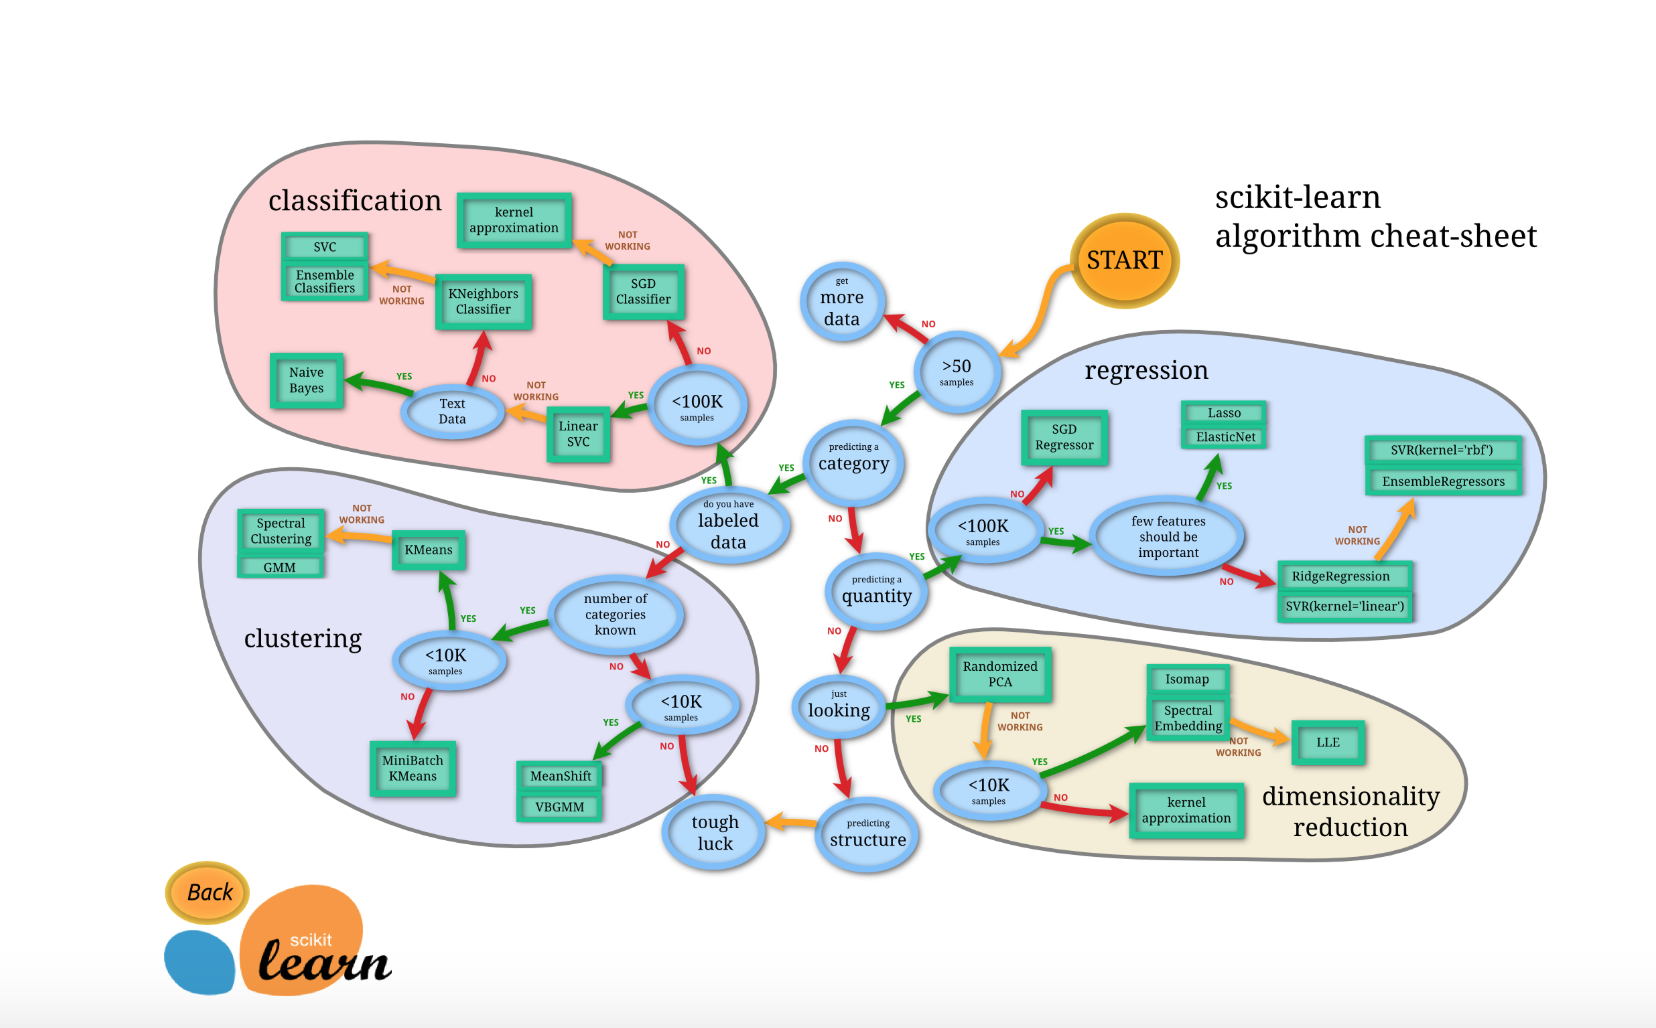

In [10]:
from  IPython.display import Image
Image("https://raw.githack.com/oceanhackweek/ohw19-tutorial-machine-learning/master/img/MLmap.png", height=500)


Source: http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html 

`scikit learn` has many built-in classification algorithms. It is a good strategy to first try a linear classifier and create a baseline, and then try more complex methods. Here are some good candidates:
* [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html),  Support Vector Classifier ([SVC](http://scikit-learn.org/stable/modules/svm.html))
* [Random Forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) - nonlinear classifiers (ensemble methods)

In [11]:
%%time
# Fitting a Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

CPU times: user 1min 35s, sys: 504 ms, total: 1min 35s
Wall time: 1min 35s


### Evaluation and Model Selection
---

**Accuracy**

Ok, we fitted a classifier, but how should we evaluate performance? First let's look at the accuracy on the train dataset: it better be good!!!

In [12]:
# prediction on the training dataset
train_accuracy = 1 - np.sum(np.abs(clf.predict(X_train) - y_train))/len(y_train)
print('Accuracy on the train dataset is '+ str(train_accuracy))

Accuracy on the train dataset is 0.8322499999999999


But that does not matter, what we want to know is how the method performs on the validation dataset, whose labels we have not seen in training.

In [13]:
# prediction on the validation dataset
val_accuracy = 1 - np.sum(np.abs(clf.predict(X_val)-y_val))/len(y_val)
print('Accuracy on the validation dataset is '+ str(val_accuracy))

Accuracy on the validation dataset is 0.7775


Ok, it is lower, as expected, but still decent.

**Receiver Operating Characteristic (ROC) Curves**

Note: the Logistic Regression is a probalistic algorithm and in fact can output a score for the chance of belonging to a class.

In [0]:
# predicting class
y_pred = clf.predict(X_val)

# predicting score for each class 
y_score = clf.predict_proba(X_val)[:,1]

Warning: `clf.predict` by default uses 0.5 as a decision threshold:

`y_score>0.5`: right whale upcall

`y_score<0.5`: no right whale upcall
    
But we can adjust this threshold to improve the performance. 

To study this performance we can use the [Receiver Operating Characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) and the Area Under the Curve (ROC AUC).

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_val, y_score)
fpr, tpr, _ = roc_curve(y_val, y_score)


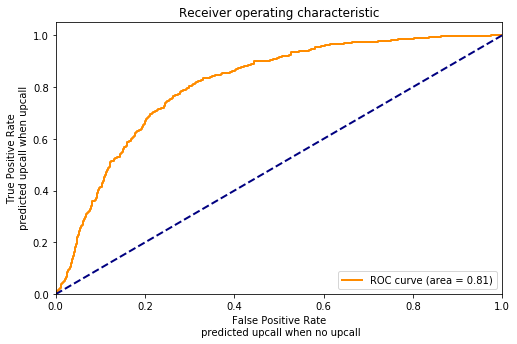

In [16]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate\n predicted upcall when no upcall')
plt.ylabel('True Positive Rate\n predicted upcall when upcall')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

threshold == 0: we will identify all whale upcalls, but also all the no upcalls will be identified as upcalls.

threshold == 1: we will miss all the whale upcalls, but won't have wrongly identified no upcalls.

The area under the curve (AUC) gives us a measure for the performance under different thresholds. It is good when close to 1. But is this enough?

*Question:* what will be the accuracy if we always claim there is no whale call?

*Hint:* what is the percentage of snippets with whale calls?

So we can achieve pretty decent accuracy with a crappy classifier, which never detects 0 of all upcalls.

We definity need to look at other metrics.

**Confusion Matrix**

It is useful to look at all types of errors the algorithm makes. For, that we compute the confusion matrix.

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylim([1.5, -.5])

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.93 0.07]
 [0.7  0.3 ]]


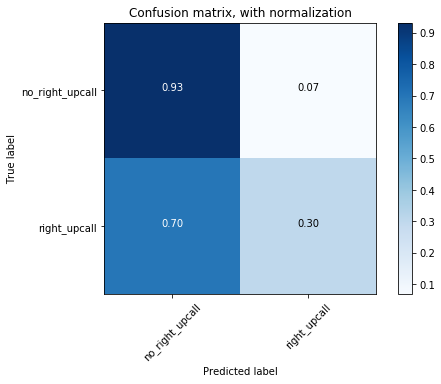

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
class_names = ['no_right_upcall','right_upcall']
plot_confusion_matrix(cnf_matrix, classes=class_names,normalize=True,
                      title='Confusion matrix, with normalization')

**Precision and Recall**

Precision: $\frac{\textrm{correctly predicted upcalls}}{\textrm{predicted upcalls}}$

In [20]:
# calculate precision with formula
predicted_upcalls = (y_pred==1)
correctly_predicted_upcalls = y_val[predicted_upcalls]

precision = sum(correctly_predicted_upcalls)/sum(predicted_upcalls)
print('Precision: {0:0.2f}'.format(precision))

Precision: 0.59


In [21]:
# calculate precision with scikit-learn function
from sklearn.metrics import precision_score

precision_score(y_val, y_pred)

0.592

In [22]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_pred, y_val)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.23


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.23')

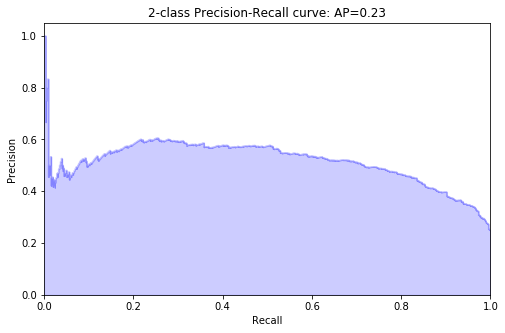

In [23]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_val, y_score)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

[F1 score](https://en.wikipedia.org/wiki/F1_score) is a measure which combines both precision and recall.

$\textrm{F1} = 2 \frac{\textrm{precision x recall}}{\text{precision+recall}}$

In [24]:
from sklearn.metrics import f1_score
print('F1 score: {0:0.2f}'.format(f1_score(y_val, y_pred)))

F1 score: 0.40


**How can we improve**?


* perform [cross validation](http://scikit-learn.org/stable/modules/cross_validation.html)

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

* try other classifiers: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [gradient boosting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and compare their ROC/PR curves

* balance the training set, not the validation one

* stratify the samples: so you have similar proportion in the subsamples

* apply dimensionality reduction first and then classify

* account for time shifting

* ???


Too slow? Have more cores? 

Checkout [dask-ml](https://dask-ml.readthedocs.io/en/latest/) for parallelizing some machine learning functions. 

### References:
---
* https://github.com/jaimeps/whale-sound-classification

* https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf

### Exercises:
---

**Exercise 1:** selected a different threshold for the predictions, and calculate the precision and recall.

**Exercise 2:** 

1. Fit the data with a RandomForest Classifier
2. Calculate the ROC curve
3. Plot together with the ROC curve for Logistic Regression


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
...

Ellipsis